# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [2]:
#fix your ID here
ID = 1234    #set the seed
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data.values / 255., mnist.target.values

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [4]:
flag = False

while not flag:

    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 500

    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]

    #looping through all elements of y_train and count how many occurrences of each element there are
    #if there are at least 10 occurrences of each element, then the flag is set to True and the loop is broken
    #otherwise, the flag is set to False and the loop is repeated
    
    for i in range(10):
        if np.count_nonzero(y_train == str(i)) >= 10:
            flag = True

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([42, 55, 53, 53, 46, 50, 49, 51, 48, 53]))

We now provide a function to print an image in the dataset and the corresponding true label given the index of the image in the dataset.

In [5]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


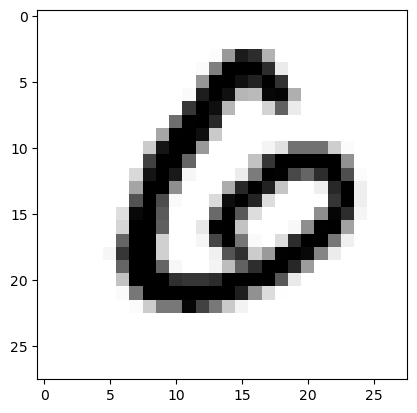

LABEL: 6
INPUT:


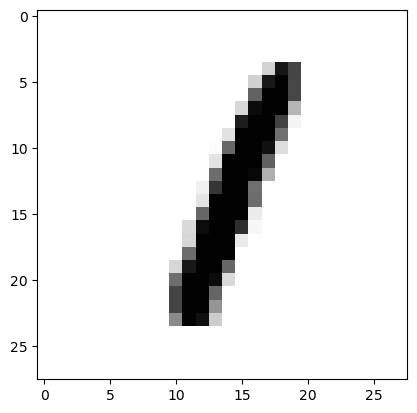

LABEL: 1


In [6]:
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

Run SVM with 5-fold cross validation to pick the best kernel and values of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Finally, print the best parameters used as well as the score obtained by the best model

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

proc = GridSearchCV(linear_SVM, parameters, cv=5)
proc.fit(X_train, y_train)

print("RESULTS FOR LINEAR MODEL:")

print("Best parameters set found:")
print(proc.best_params_)

print("Score with best parameters:")
print(proc.best_score_)

print("\nAll scores on the grid:")
means = proc.cv_results_['mean_test_score']
print(means)

# parameters for poly with degree 2 kernel
parameters2 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

proc2 = GridSearchCV(poly2_SVM, parameters2, cv=5)
proc2.fit(X_train, y_train)


print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(proc2.best_params_)

print("Score with best parameters:")
print(proc2.best_score_)

print("\nAll scores on the grid:")
means = proc2.cv_results_['mean_test_score']
print(means)

# parameters for rbf SVM
parameters3 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

proc3 = GridSearchCV(rbf_SVM, parameters3, cv=5)
proc3.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(proc3.best_params_)

print("Score with best parameters:")
print(proc3.best_score_)

print("\nAll scores on the grid:")
means = proc3.cv_results_['mean_test_score']
print(means)

RESULTS FOR LINEAR MODEL:
Best parameters set found:
{'C': 1}
Score with best parameters:
0.8300000000000001

All scores on the grid:
[0.83 0.83 0.83]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.852

All scores on the grid:
[0.816 0.852 0.852 0.848 0.852 0.852 0.852 0.852 0.852]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8619999999999999

All scores on the grid:
[0.854 0.532 0.11  0.862 0.572 0.11  0.862 0.572 0.11 ]


For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [8]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf')

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.016000
Best SVM test error: 0.116734


## Use logistic regression for comparison

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameters. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...).

Note: during training you may receive a "ConvergenceWarning" that indicates that the logistic regression solver did not converge to the optimal result. Given the scope of the notebook, we can ignore such warning but in real-world scenarios you should take corrective measures such as increasing the number of training iterations and/or the runtime for training or picking a different optimizer

In [9]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error = 1. - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.162115


/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best logistic regression training error with CV: 0.050000
Best logistic regression test error with CV: 0.161165


Both the Logistic Regression and SVM methods are used for the purpose of classification, but the approach is completely different. The former is performing the classification operation based on a probabilistic function, so the classification as 0/1 (or -1/1) takes place as long as the model is confident enough to perform that operation; on the other hand, the second method consists in dividing the n-dimensional space with an halfspace of dimension n-1 to separate the data in the two classes by picking the best possible distinguisher. 

All of this allows us to comprehend better the results we got: being more "abstract", the SVM model is able to generalize the classification operation better than the Logistic Regression one, which on the other hand is more directly dependent from the training data itself and therefore more prone to overfitting. And all of this can be seen from the results; the SVM model has an higher training error than the Logistic Regression method's one, meaning that it is not able to perfectly fit the training data, but it is able to generalize better on the test data, which is the goal of the classification operation. The Logistic Regression method on the other hand is perfectly able to classify the training data, but it is not able to generalize well on the test data, as it's test error is higher than the one of the SVM model.

**small comment regarding the results of SVM kernel**: according to the scores, it turns out that the *rbf* kernel was the more appropriate choice for the SVM model. This makes sense, as the MNIST dataset would require the classification of the not-so-easily-distinguishable elements in 10 classes (instead of just 2), so it's more likely for non-linear decision boundaries (obtained with the *rbf* kernel) to better differentiate the classes than a simple, linear kernel.

#### Let's now see an element that gets missclassified by the logistic regression model and gets correctly classified by the SVM one.

INPUT:


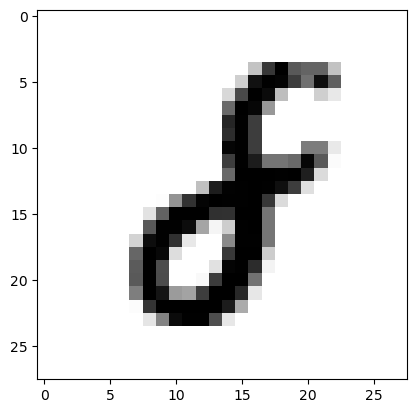

LABEL: 8
Logistic regression prediction: ['9']
SVM prediction: ['8']


In [10]:
missclassified_index = 0
for i in range(len(y_test)):
    if lr.predict(X_test[i].reshape(1,-1)) != y_test[i] and best_SVM.predict(X_test[i].reshape(1,-1)) == y_test[i] :
        missclassified_index = i
        break

#plot the element
plot_digit(X_test,y_test,missclassified_index)

#label predicted by logistic regression
print("Logistic regression prediction: %s" % lr.predict(X_test[missclassified_index].reshape(1,-1)))
#label predicted by SVM
print("SVM prediction: %s" % best_SVM.predict(X_test[missclassified_index].reshape(1,-1)))

## More data
Now let's do the same but using 1000 data points for training.

In [11]:
flag = False

while not flag:

    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 1000

    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]
    
    for i in range(10):
        if np.count_nonzero(y_train == str(i)) >= 10:
            flag = True

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([107, 117,  88, 105, 104,  84, 104,  92, 108,  91]))

In [12]:
# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

proc = GridSearchCV(linear_SVM, parameters, cv=5)
proc.fit(X_train, y_train)

print("RESULTS FOR LINEAR MODEL:")

print("Best parameters set found:")
print(proc.best_params_)

print("Score with best parameters:")
print(proc.best_score_)

print("\nAll scores on the grid:")
means = proc.cv_results_['mean_test_score']
print(means)

# parameters for poly with degree 2 kernel
parameters2 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2

proc2 = GridSearchCV(poly2_SVM, parameters2, cv=5)
proc2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(proc2.best_params_)

print("Score with best parameters:")
print(proc2.best_score_)

print("\nAll scores on the grid:")
means = proc2.cv_results_['mean_test_score']
print(means)

# parameters for rbf SVM
parameters3 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# SAME AS ABOVE FOR RBF KERNEL
proc3 = GridSearchCV(rbf_SVM, parameters3, cv=5)
proc3.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(proc3.best_params_)

print("Score with best parameters:")
print(proc3.best_score_)

print("\nAll scores on the grid:")
means = proc3.cv_results_['mean_test_score']
print(means)

RESULTS FOR LINEAR MODEL:
Best parameters set found:
{'C': 1}
Score with best parameters:
0.891

All scores on the grid:
[0.891 0.891 0.891]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.9179999999999999

All scores on the grid:
[0.876 0.917 0.917 0.918 0.917 0.917 0.917 0.917 0.917]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.929

All scores on the grid:
[0.91  0.614 0.117 0.929 0.641 0.117 0.929 0.641 0.117]


In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf')

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.014000
Best SVM test error: 0.081971


In [14]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error = 1. - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

# logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.130594


/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Best logistic regression training error with CV: 0.000000
Best logistic regression test error with CV: 0.133232


/home/lucaatme/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


INPUT:


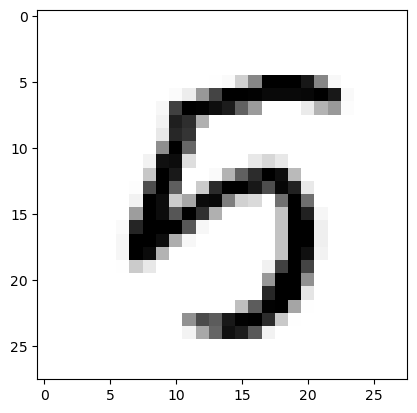

LABEL: 5
Logistic regression prediction: ['8']
SVM prediction: ['5']


In [15]:
#find an element in the test set that is missclassified by logistic regression

missclassified_index = 0
for i in range(len(y_test)):
    if lr.predict(X_test[i].reshape(1,-1)) != y_test[i] and best_SVM.predict(X_test[i].reshape(1,-1)) == y_test[i] :
    #if best_SVM.predict(X_test[i].reshape(1,-1)) != y_test[i]:
        missclassified_index = i
        break

#plot the element
plot_digit(X_test,y_test,missclassified_index)

#label predicted by logistic regression
print("Logistic regression prediction: %s" % lr.predict(X_test[missclassified_index].reshape(1,-1)))
#label predicted by SVM
print("SVM prediction: %s" % best_SVM.predict(X_test[missclassified_index].reshape(1,-1)))

In the previous training with 500 samples the Logistic Regression model led to a training error equal to zero, meaning there was overfitting as the difference between training and test error was quite evident. At the same time the results obtained with either one of the two methods were quite good, so doubling the size of the training set could additionally increase the performance or introduce some overfitting.

Let's have a look at what happened at the SVM model: the value of the training error has slightly increased, meaning that our model is abstracting a little bit more from the training set; we also have a smaller test error, an indication that the model is now able to perform better in a generic scenario. 
The same thing happens to the Logistic Regression model: the version using 5-fold cross validation no longer has a training error of 0 but the test error has decreased of almost 2 points; the version of LR without folds is performing better too, by keeping 0% as training error and a test error of 13.18 against the 14.58 of the previous model (training set of size 500). We can then say that adding those 500 elements to the training set is increasing the performance of the model afterall, and it is doing all of this without compromising the computational costs. 